<a href="https://colab.research.google.com/github/Jorgecuenca1/BackendCulturameta/blob/main/Tumor%20Pituitary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import zipfile

zip_path = "/content/Brain-Tumor-Classification-DataSet-master.zip"  # Ruta del archivo ZIP subido

# Extraer el contenido del archivo ZIP en la carpeta actual
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("/content/")

In [55]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout
from sklearn.metrics import accuracy_score

In [56]:
import ipywidgets as widgets
import io
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf

In [57]:
X_train = []
Y_train = []
image_size = 150
labels = ['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']
for i in labels:
    folderPath = os.path.join('Brain-Tumor-Classification-DataSet-master/Training',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)

for i in labels:
    folderPath = os.path.join('Brain-Tumor-Classification-DataSet-master/Testing',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)

X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [58]:
X_train,Y_train = shuffle(X_train,Y_train,random_state=101)
X_train.shape

(3264, 150, 150, 3)

In [59]:
X_train,X_test,y_train,y_test = train_test_split(X_train,Y_train,test_size=0.1,random_state=101)

In [60]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train=y_train_new
y_train = tf.keras.utils.to_categorical(y_train)

y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test=y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

In [61]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu',input_shape=(150,150,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512,activation = 'relu'))
model.add(Dense(512,activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(4,activation='softmax'))

In [62]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 conv2d_10 (Conv2D)          (None, 146, 146, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 73, 73, 64)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 73, 73, 64)        0         
                                                                 
 conv2d_11 (Conv2D)          (None, 71, 71, 64)        36928     
                                                                 
 conv2d_12 (Conv2D)          (None, 69, 69, 64)        36928     
                                                      

In [63]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [64]:
history = model.fit(X_train,y_train,epochs=50,validation_split=0.1)

Epoch 1/50
83/83 [==============================] - 358s 4s/step - loss: 2.0410 - accuracy: 0.2849 - val_loss: 1.3480 - val_accuracy: 0.4490
Epoch 2/50
83/83 [==============================] - 355s 4s/step - loss: 1.2791 - accuracy: 0.3897 - val_loss: 1.1263 - val_accuracy: 0.4932
Epoch 3/50
83/83 [==============================] - 356s 4s/step - loss: 1.0177 - accuracy: 0.5392 - val_loss: 0.9334 - val_accuracy: 0.5782
Epoch 4/50
83/83 [==============================] - 356s 4s/step - loss: 0.9028 - accuracy: 0.6001 - val_loss: 0.8652 - val_accuracy: 0.6190
Epoch 5/50
83/83 [==============================] - 356s 4s/step - loss: 0.8238 - accuracy: 0.6262 - val_loss: 0.7505 - val_accuracy: 0.6633
Epoch 6/50
83/83 [==============================] - 355s 4s/step - loss: 0.7111 - accuracy: 0.6932 - val_loss: 0.7372 - val_accuracy: 0.6565
Epoch 7/50
83/83 [==============================] - 355s 4s/step - loss: 0.6713 - accuracy: 0.7223 - val_loss: 0.7007 - val_accuracy: 0.7211
Epoch 8/50
83

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

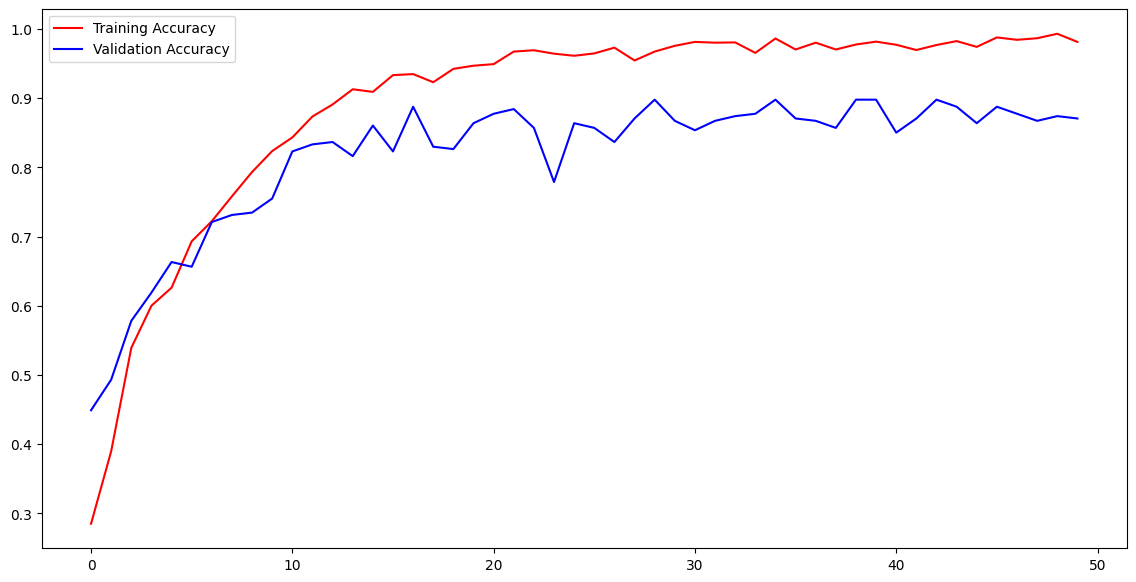

In [73]:
model.save('braintumor.h5')

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.legend(loc='upper left')
plt.show()

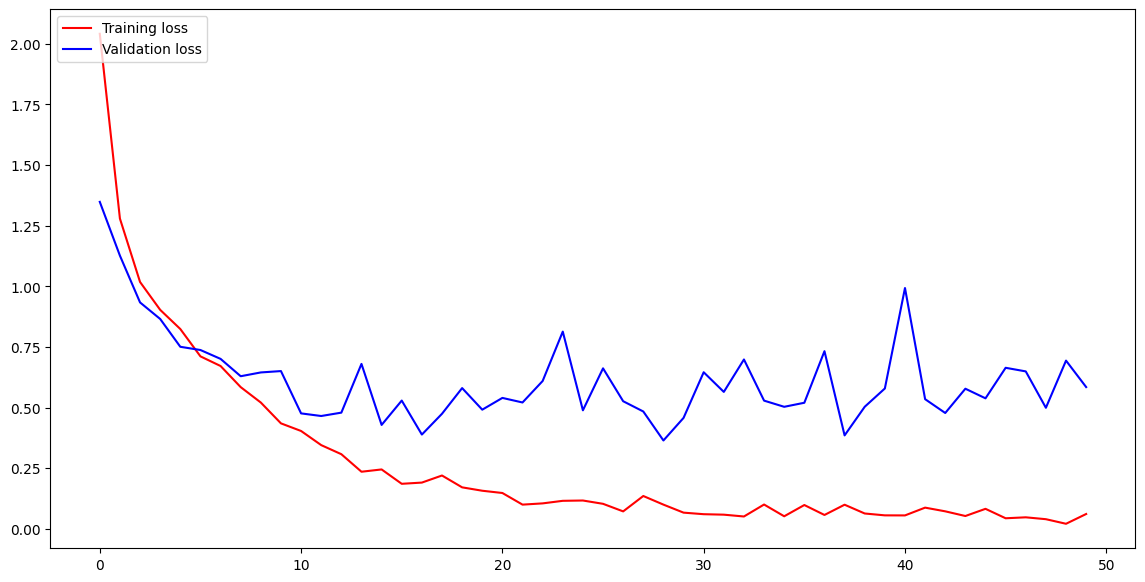

In [74]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.legend(loc='upper left')
plt.show()

Prediction

In [93]:
img = cv2.imread('/content/Brain-Tumor-Classification-DataSet-master/Training/pituitary_tumor/p (111).jpg')
img = cv2.resize(img,(150,150))
img_array = np.array(img)
img_array.shape

(150, 150, 3)

In [94]:
img_array = img_array.reshape(1,150,150,3)
img_array.shape

(1, 150, 150, 3)

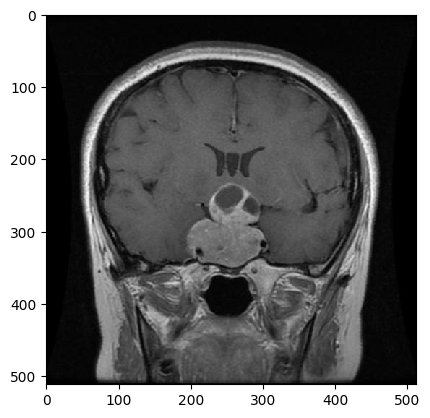

In [95]:
from tensorflow.keras.preprocessing import image
img = image.load_img('/content/Brain-Tumor-Classification-DataSet-master/Training/pituitary_tumor/p (111).jpg')
plt.imshow(img,interpolation='nearest')
plt.show()

In [96]:
a=model.predict(img_array)
indices = a.argmax()
indices
if indices == 1:

    print("Tumor meningioma")

if indices == 0:
    print("Es glioma tumor")
if indices == 2:
   print("No hay tumor")
if indices == 3:
    print("Tumor pituitary")

1/1 [==============================] - 0s 50ms/step
Tumor pituitary
